##  Analyzing Charlotte Hornets' Offensive Trends in the 2024-25 Season - Mini Project

#### Here is a simple and quick mini project I put together for the purpose of applying for the Basketball Data Scientist role with the Charlotte Hornets

### 1. Start with Libraries and Data Import:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Basketball Reference
url = "https://www.basketball-reference.com/teams/CHO/2025_games.html"
data = pd.read_html(url)
games = data[0]


### 2. Clean the Data:

In [12]:
# Remove unnecessary rows
games = games[~games['G'].str.contains("Overall|Record", na=False)]

# Rename columns
games.rename(columns={'Tm': 'PTS', 'Opp': 'Opp PTS'}, inplace=True)

# Convert to numeric
games['PTS'] = pd.to_numeric(games['PTS'], errors='coerce')
games['Opp PTS'] = pd.to_numeric(games['Opp PTS'], errors='coerce')
games['Date'] = pd.to_datetime(games['Date'], errors='coerce')

# Drop rows with missing values
games.dropna(subset=['PTS', 'Opp PTS', 'Date'], inplace=True)


### 3. Add Calculations:

In [13]:
# Calculate Point Differential and Month
games['Point Differential'] = games['PTS'] - games['Opp PTS']
games['Month'] = games['Date'].dt.month

### 4. Monthly Trends:

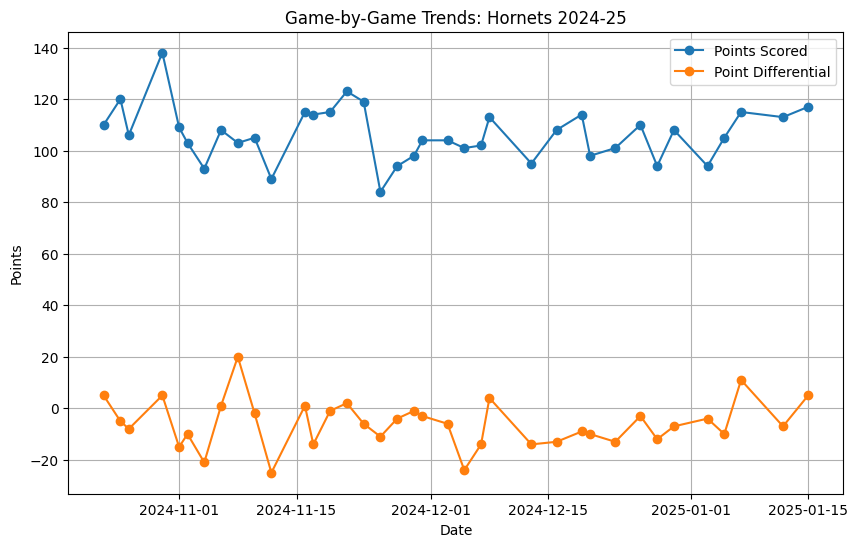

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(games['Date'], games['PTS'], marker='o', label="Points Scored")
plt.plot(games['Date'], games['Point Differential'], marker='o', label="Point Differential")
plt.title("Game-by-Game Trends: Hornets 2024-25")
plt.xlabel("Date")
plt.ylabel("Points")
plt.legend()
plt.grid(True)
plt.show()


### 5. Quick Insight:

You can begin to see the trends taking shape as the season unfolds. This is a small sample size, however, the data does seems to follow the ebb and flow of early season team/individual performance, player injuries and lineup/roster adjusments. For example, the dip in 'points scored' in late November could be attributed to LaMelo Ball missing weeks of action with wrist and ankle injuries. And LaMelo's return around mid January, coinciding with a 10-point increase in average scoring.

#### Author 

Bracey Wright